In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Creando dataframes

In [2]:
nba = pd.read_csv('nba_contracts_history.csv')

In [3]:
nba.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


Seleccionaremos las siguientes columnas para estudiar el fenómeno del salario de un jugador de la nba:

In [4]:
nba = nba[['NAME','CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN','+/-']].drop_duplicates()

In [5]:
nba.isna().sum()

NAME              0
CONTRACT_START    0
CONTRACT_END      0
AVG_SALARY        0
AGE               0
GP                0
W                 0
L                 0
MIN               0
+/-               0
dtype: int64

In [6]:
nba2 = nba.copy()
nba2_nombres = nba2[['NAME']]
nba2 = nba2[['AVG_SALARY','+/-']]

Se normalizan los datos

In [7]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(nba2)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns = {0: 'AVG_SALARY', 1:'+/-'}) 

Representación gráfica de los datos

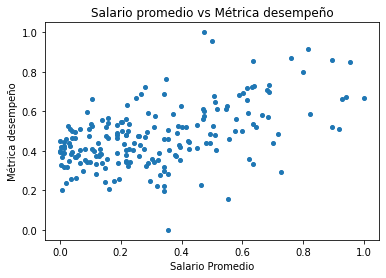

In [8]:
x1 = df_escalado['AVG_SALARY'].values
y1 = df_escalado['+/-'].values
plt.ylabel('Métrica desempeño')
plt.xlabel('Salario Promedio')
plt.title('Salario promedio vs Métrica desempeño')
plt.plot(x1,y1,'o',markersize=4)

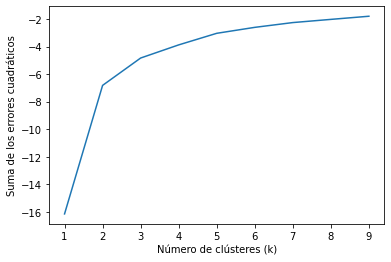

In [9]:
nc = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

La curva nos muestra que el k óptimo puede ser de 5 aprox

In [10]:
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
centroids

array([[0.53139108, 0.51501453],
       [0.06371897, 0.38294868],
       [0.30787796, 0.3282458 ],
       [0.74256268, 0.74161999],
       [0.21925898, 0.54466599]])

In [11]:
labels = kmeans.predict(df_escalado)
nba2['label'] = labels

Colocamos el nombre de los jugadores a nuestro dataframe

In [12]:
nba2['NAME']= nba2_nombres

In [13]:
nba2 = nba2[['NAME','AVG_SALARY','+/-','label']]

EJEMPLO DE LA ETIQUETA

In [14]:
nba2[nba2['label']==0]

,NAME,AVG_SALARY,+/-,label
1,Brook Lopez,2.116568e+07,-104.0,0
4,Dwight Howard,1.341074e+07,89.0,0
20,Goran Dragic,1.700045e+07,20.0,0
21,Nicolas Batum,2.321739e+07,211.0,0
29,Eric Bledsoe,1.400000e+07,136.0,0
35,Kevin Love,1.469391e+07,26.0,0
36,John Wall,1.628404e+07,196.0,0
37,Tyson Chandler,1.385236e+07,295.0,0
42,Jonas Valanciunas,1.559551e+07,147.0,0
46,Kent Bazemore,1.750000e+07,76.0,0


Representación gráfica del agrupamiento

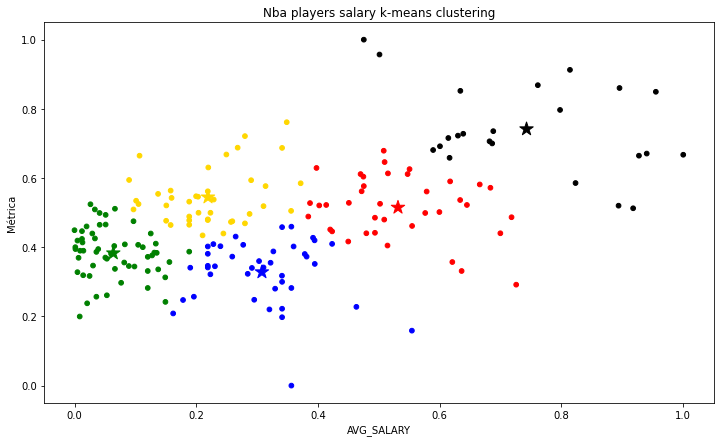

In [15]:
colores=['red','green','blue','black','gold']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.rcParams["figure.figsize"] = (12,7)
plt.scatter(x1, y1, c=asignar, s=22)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=['red','green','blue','black','gold'], s=200)#Marco centroides.
plt.xlabel('AVG_SALARY')
plt.ylabel('Métrica')
plt.title('Nba players salary k-means clustering')
plt.show()

Agregamos la clasificación a nuestro dataframe inicial.

In [16]:
nba['label'] = labels
nba

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,+/-,label
0,Wesley Matthews,2019,2020,2.564753e+06,32.0,69.0,27.0,42.0,2091.0,-90.0,1
1,Brook Lopez,2015,2017,2.116568e+07,27.0,72.0,34.0,38.0,2100.0,-104.0,0
2,DeAndre Jordan,2011,2014,1.075976e+07,22.0,80.0,31.0,49.0,2047.0,-100.0,2
3,Markieff Morris,2015,2018,8.143324e+06,25.0,82.0,39.0,43.0,2581.0,105.0,4
4,Dwight Howard,2018,2019,1.341074e+07,32.0,81.0,35.0,46.0,2463.0,89.0,0
...,...,...,...,...,...,...,...,...,...,...,...
194,Brook Lopez,2012,2014,1.469367e+07,24.0,5.0,2.0,3.0,136.0,-27.0,2
195,Nikola Vucevic,2015,2018,1.200000e+07,24.0,74.0,21.0,53.0,2529.0,-302.0,2
196,Aron Baynes,2015,2017,5.766667e+06,28.0,70.0,49.0,21.0,1122.0,136.0,4
197,Andre Iguodala,2013,2016,1.200000e+07,29.0,80.0,57.0,23.0,2779.0,380.0,4


## Ejemplo tridimensional

In [17]:
nba3 = nba.copy()
nba3_nombres = nba3[['NAME']]
nba3 = nba3[['AVG_SALARY','AGE','+/-']]

In [18]:
min_max_scaler1 = preprocessing.MinMaxScaler() 
df_escalado1 = min_max_scaler1.fit_transform(nba3)
df_escalado1 = pd.DataFrame(df_escalado1) 
df_escalado1 = df_escalado1.rename(columns = {0: 'AVG_SALARY', 1: 'AGE', 2:'+/-'}) 

In [19]:
x = df_escalado1['AVG_SALARY'].values
y = df_escalado1['AGE'].values
z = df_escalado1['+/-'].values

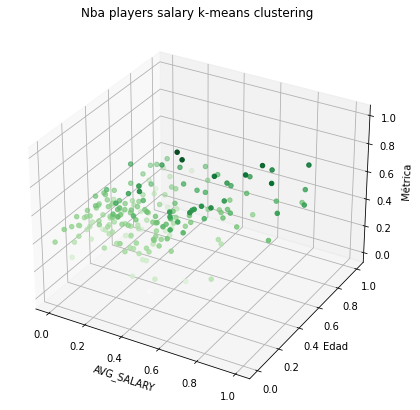

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens');
ax.set_xlabel("AVG_SALARY")
ax.set_ylabel("Edad")
ax.set_zlabel("Métrica")
plt.title('Nba players salary k-means clustering')
plt.show()

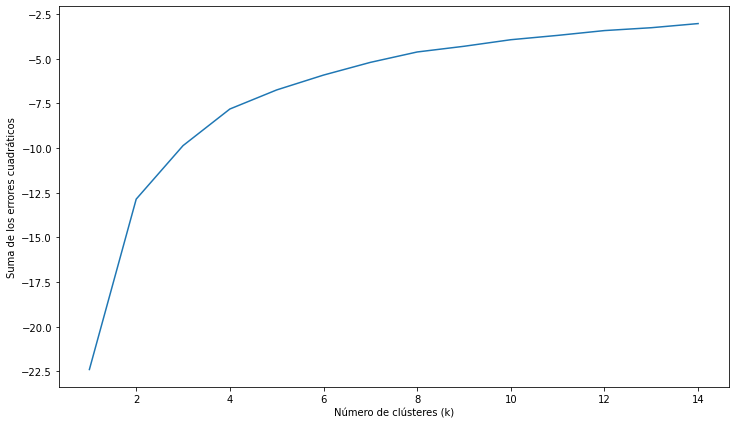

In [21]:
nc = range(1, 15) 
kmeans2 = [KMeans(n_clusters=i) for i in nc]
score2 = [kmeans2[i].fit(df_escalado1).score(df_escalado1) for i in range(len(kmeans2))]
score2
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score2)

La curva indica que 4 o 5 podría ser una cantidad adecuada de clústeres.

In [22]:
kmeans2 = KMeans(n_clusters=4).fit(df_escalado1)
centroids2 = kmeans2.cluster_centers_
centroids2

array([[0.10807691, 0.27857143, 0.41529847],
       [0.41196467, 0.25589623, 0.43854098],
       [0.67950508, 0.47861842, 0.66180533],
       [0.18953287, 0.60304054, 0.42852669]])

In [23]:
labels2 = kmeans2.predict(df_escalado1)
nba3['label'] = labels2

Colocamos el nombre de los jugadores a nuestro dataframe

In [24]:
nba3['NAME']= nba3_nombres

Representación gráfica del agrupamiento

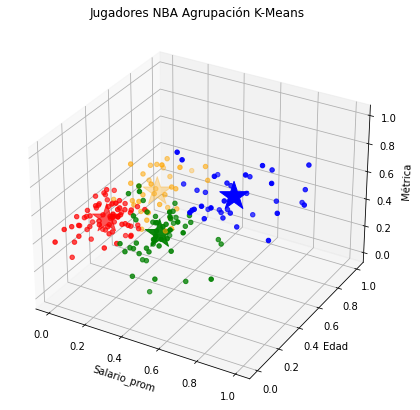

In [25]:
colores=['red','green','blue','orange']
asignar=[]
for row in labels2:
     asignar.append(colores[row])
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=asignar)
ax.scatter3D(centroids2[:, 0], centroids2[:, 1],centroids2[:, 2], marker = '*',c=['red','green','blue','orange'], 
            s=900)
ax.set_xlabel("Salario_prom")
ax.set_ylabel("Edad")
ax.set_zlabel("Métrica")
plt.title('Jugadores NBA Agrupación K-Means')
plt.show()

